<a href="https://colab.research.google.com/github/sjangeli/Thinkful-Data-Science-Projects/blob/master/Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Nobody likes to hear it, because it's dull, but the reason you win or lose is darn near always the same - pitching.*

~ Earl Weaver

### *Guessing what the pitcher is going to throw is 80% of being a successful hitter. The other 20% is just execution.*

~ Hank Aaron

# Pitching Trends (2015 - 2018)

In this analysis I analyze whether or not there are any staticially significant differences from year to year in major attributes from three pitch types: four seam fastball, slider, and curveball. 

This analysis is intended to provide insight to pitchers, batters, and front office management. Pitchers will want to see what the trends are in pitching overall so that they can either keep up or make a strategic decision to deviate from the trend since batters will try to adapt to the current trend. Managers will want to know what the trends are so that they can make better decisions on what batters to use to set their lineups and how to train their teams to address the current trends. General managers will want to use this analysis to better inform what pitchers and batters they should be looking at picking up and/or letting go. Lastly, batters will want to stay current on pitching trends so that they can adapt their training plans to focus on current pitching trends. 

In [0]:
# Loading in the data...

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# My imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create a DataFrame with the pitch information.
pitches = drive.CreateFile({'id':'12S9Mc5HCehr6SXG_ZLhK3A4P5qooksot'}) 
pitches.GetContentFile('pitches.csv')  
pitches = pd.read_csv('pitches.csv')

In [2]:
# Narrow down the selection of columns to those containing the information we want to analyze.

pitches = pitches[['start_speed', 'end_speed', 'spin_rate', 'break_length', 'type', 'pitch_type', 'ab_id']]

# How I handled null values: There are about 14,000 NaN values, mainly in the start and end speed columns. 
# There are over 2,867,153 pitches so I feel comfortable dropping them.

pitches = pitches.dropna()
pitches.head()

# Strip the year information from the ab_id and create a year column so that I can disaggregate the data according to year.

year = []
for entry in pitches.ab_id:
  current = str(entry)
  current = current[0:4]
  year.append(current)

pitches['year'] = year

pitches.head()

,start_speed,end_speed,spin_rate,break_length,type,pitch_type,ab_id,year
0,92.9,84.1,2305.052,3.2,S,FF,2.015000e+09,2015
1,92.8,84.1,2689.935,3.4,S,FF,2.015000e+09,2015
2,94.1,85.2,2647.972,3.7,S,FF,2.015000e+09,2015
3,91.0,84.0,1289.590,5.0,B,FF,2.015000e+09,2015
4,75.4,69.6,1374.569,12.0,B,CU,2.015000e+09,2015


In [0]:
# Break the pitches into those thrown each year.

pitches_15 = pitches[pitches.year == '2015']
pitches_16 = pitches[pitches.year == '2016']
pitches_17 = pitches[pitches.year == '2017']
pitches_18 = pitches[pitches.year == '2018']

# Break the pitches into pitch types. 

pitches_ff = pitches[pitches.pitch_type == 'FF']
pitches_sl = pitches[pitches.pitch_type == 'SL']
pitches_cu = pitches[pitches.pitch_type == 'CU']

# Break the pitches according to year and type. 

pitches_15_ff = pitches_15[pitches_15.pitch_type == 'FF']
pitches_16_ff = pitches_16[pitches_16.pitch_type == 'FF']
pitches_17_ff = pitches_17[pitches_17.pitch_type == 'FF']
pitches_18_ff = pitches_18[pitches_18.pitch_type == 'FF']

pitches_15_sl = pitches_15[pitches_15.pitch_type == 'SL']
pitches_16_sl = pitches_16[pitches_16.pitch_type == 'SL']
pitches_17_sl = pitches_17[pitches_17.pitch_type == 'SL']
pitches_18_sl = pitches_18[pitches_18.pitch_type == 'SL']

pitches_15_cu = pitches_15[pitches_15.pitch_type == 'CU']
pitches_16_cu = pitches_16[pitches_16.pitch_type == 'CU']
pitches_17_cu = pitches_17[pitches_17.pitch_type == 'CU']
pitches_18_cu = pitches_18[pitches_18.pitch_type == 'CU']

## The Fastball (2015 - 2018)

The four seam fastball is the dominant pitch in MLB accounting for around 35% of all pitches thrown each year. The dominant attribute of a four seam fastball is its speed. In this part of the analysis I check to see if pitchers are throwing their four seamers faster, slower, or about the same speed each year. 

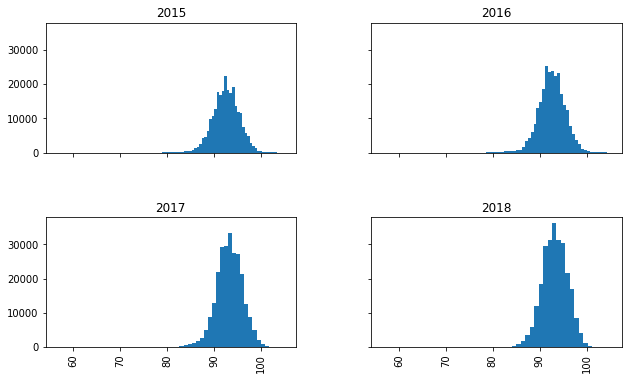

DescribeResult(nobs=249755, minmax=(76.7, 103.4), mean=92.48138255490377, variance=7.82116015200474, skewness=-0.2998463007108673, kurtosis=0.6437803045356212)
DescribeResult(nobs=257649, minmax=(73.6, 105.0), mean=92.5750625851449, variance=7.579982785101436, skewness=-0.22923460188617828, kurtosis=0.8300410015991968)
DescribeResult(nobs=253387, minmax=(61.0, 104.2), mean=93.22313141558169, variance=7.792148982765395, skewness=-0.5336550779719412, kurtosis=2.70113488007751)
DescribeResult(nobs=254086, minmax=(56.5, 104.0), mean=93.16640350117679, variance=7.559287115915719, skewness=-0.6085304719008288, kurtosis=3.8819462704084557)


In [4]:
# Create a histogram plot of each year's distribution of four seam fastball starting speed.

pitches_ff['start_speed'].hist(by = pitches['year'], bins = 50, figsize = (10,6), sharex = True, sharey = True)
plt.show()

# The histograms appear to be normally distributed, but to see the skew and kurtosis I used stats.describe().

print(stats.describe(pitches_15_ff['start_speed']))
print(stats.describe(pitches_16_ff['start_speed']))
print(stats.describe(pitches_17_ff['start_speed']))
print(stats.describe(pitches_18_ff['start_speed']))

# A couple interesting observations from these plots are that the 2015 and 2016 
# means are pretty similar but there is a jump up in speed in 2017 that is 
# maintained in 2018. This is accompanied by a sharp increase in kurtosis,
# meaning that many more pitches were in a tighter range around the mean. 


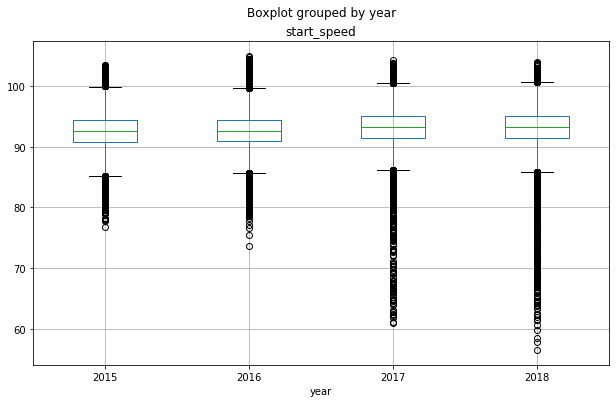

In [5]:
# Visualizing the speeds another way we see that there's another interesting
# change between the 2015/16 seasons and the 17/18 seasons. Although there
# was a sharp increase in the number of pitches thrown in a tighter band of 
# speeds, there was also at the same time a wider range of speeds thrown. 

pitches_ff.boxplot('start_speed', by='year', figsize=(10, 6))

In [6]:
# Let's check to make sure that the data sets are normally distributed using
# Shaprio-Wilk.

print(stats.shapiro(pitches_15_ff['start_speed']))
print(stats.shapiro(pitches_16_ff['start_speed']))
print(stats.shapiro(pitches_17_ff['start_speed']))
print(stats.shapiro(pitches_18_ff['start_speed']))

# All of the W statistics are near 1, meaning there isn't much deviation from
# a normal distribution.

(0.9936863780021667, 0.0)
(0.9944645762443542, 0.0)
(0.9832635521888733, 0.0)
(0.9776443839073181, 0.0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [7]:
# Next, I'll investigate whether there is any statistically significant 
# difference between the data sets by utilizing a one-way ANOVA test.

stats.f_oneway(pitches_15_ff['start_speed'], pitches_16_ff['start_speed'], pitches_17_ff['start_speed'], pitches_18_ff['start_speed'])

# The result of the one-way ANOVA shows that there is indeed a significant differece
# between at least one of the years.

F_onewayResult(statistic=4942.662938859677, pvalue=0.0)

In [8]:
# To see if there are any years in particular that differ more than others I use Tukey's HSD test.

tukey = pairwise_tukeyhsd(endog = pitches_ff['start_speed'],      # Data
                          groups = pitches_ff['year'],   # Groups
                          alpha=0.05)

tukey.summary()

# As we can see from the table, there was a significant difference between
# the 2015/16 and 2017/18 seasons.

group1,group2,meandiff,p-adj,lower,upper,reject
2015,2016,0.0937,0.001,0.0737,0.1137,True
2015,2017,0.7417,0.001,0.7217,0.7618,True
2015,2018,0.685,0.001,0.665,0.7051,True
2016,2017,0.6481,0.001,0.6281,0.668,True
2016,2018,0.5913,0.001,0.5714,0.6113,True
2017,2018,-0.0567,0.001,-0.0767,-0.0367,True


## The Slider (2015 - 2018)

The slider is one of the most devastating pitches in MLB, used mainly as a strike out pitch by hard throwing pitchers. One of the key attributes that differentiates good sliders from bad sliders is the spin rate. In this part of the analysis I analyze whether or not the spin rate on sliders is increasing, decreasing or staying about the same over time.

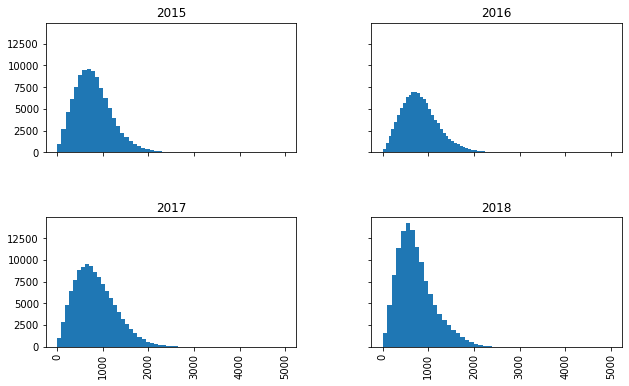

DescribeResult(nobs=101914, minmax=(1.214, 4602.326), mean=795.0120605019919, variance=162615.28375193765, skewness=0.7358935434960215, kurtosis=0.7800439252088589)
DescribeResult(nobs=108225, minmax=(5.321000000000001, 3123.143), mean=821.6751453268655, variance=165025.7649009376, skewness=0.7128738808945254, kurtosis=0.6601080960803718)
DescribeResult(nobs=117643, minmax=(2.595, 4397.165), mean=842.9548348393018, variance=195608.8641477498, skewness=0.665005103024164, kurtosis=0.3313625538041003)
DescribeResult(nobs=122796, minmax=(2.325, 4989.782), mean=729.526100899052, variance=160988.79486991174, skewness=0.8954656438442926, kurtosis=0.7504539719349439)


In [9]:
# Create a histogram of each year's spin rate on the sliders thrown and generate
# descriptive statistics. 

pitches_sl['spin_rate'].hist(by = pitches['year'], bins = 50, figsize = (10,6), sharex = True, sharey = True)
plt.show()

print(stats.describe(pitches_15_sl['spin_rate']))
print(stats.describe(pitches_16_sl['spin_rate']))
print(stats.describe(pitches_17_sl['spin_rate']))
print(stats.describe(pitches_18_sl['spin_rate']))

# The histograms appear fairly normally distributed but also display some interesting
# differences from year to year, especially 2018 displaying much higher kurtosis and a
# potentially significant drop in mean sping rate. 

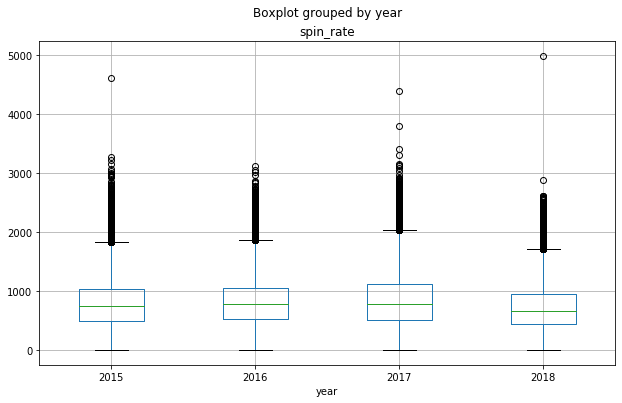

In [10]:
# Visualizing the spin rates another way we clearly see that the slider
# displays a much larger high spin rate tail than a low spin rate tail, potentially
# suggesting that there is potentially a minimum spin rate needed to develop an effective slider. 

pitches_sl.boxplot('spin_rate', by='year', figsize=(10, 6))

In [11]:
# Let's check to make sure that the data sets are normally distributed using
# Shaprio-Wilk.

print(stats.shapiro(pitches_15_sl['spin_rate']))
print(stats.shapiro(pitches_16_sl['spin_rate']))
print(stats.shapiro(pitches_17_sl['spin_rate']))
print(stats.shapiro(pitches_18_sl['spin_rate']))

# All of the W statistics are near 1, meaning there isn't much deviation from
# a normal distribution.

(0.9691096544265747, 0.0)
(0.9708563089370728, 0.0)
(0.9701095819473267, 0.0)
(0.9493557810783386, 0.0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [12]:
# Next, I'll investigate whether there is any statistically significant 
# difference between the data sets by utilizing a one-way ANOVA test.

stats.f_oneway(pitches_15_sl['spin_rate'], pitches_16_sl['spin_rate'], pitches_17_sl['spin_rate'], pitches_18_sl['spin_rate'])

# The result of the one-way ANOVA shows that there is indeed a significant differece
# between at least one of the years.

F_onewayResult(statistic=1698.946525133443, pvalue=0.0)

In [13]:
# To see if there are any years in particular that differ more than others I use Tukey's HSD test.

tukey = pairwise_tukeyhsd(endog = pitches_sl['spin_rate'],      # Data
                          groups = pitches_sl['year'],   # Groups
                          alpha=0.05)

tukey.summary()

# As we can see from the table, there was a significant drop in the mean spin rate
# from the 2017 to 2018 season after increasing from 2015 to 2016 and 2016 to 2017 seasons.

group1,group2,meandiff,p-adj,lower,upper,reject
2015,2016,26.6631,0.001,22.0211,31.3051,True
2015,2017,47.9428,0.001,43.3918,52.4937,True
2015,2018,-65.486,0.001,-69.9924,-60.9795,True
2016,2017,21.2797,0.001,16.8004,25.759,True
2016,2018,-92.149,0.001,-96.5831,-87.715,True
2017,2018,-113.4287,0.001,-117.7674,-109.0901,True


## The Curveball (2015 - 2018)

The curveball has been around for a long time but it continues to evolve. It is defined by its dramatic break that can make batters knees buckle. In this analysis I investigate whether the break length of curveballs has increased, decreased or stayed about the same from 2015 - 2018.

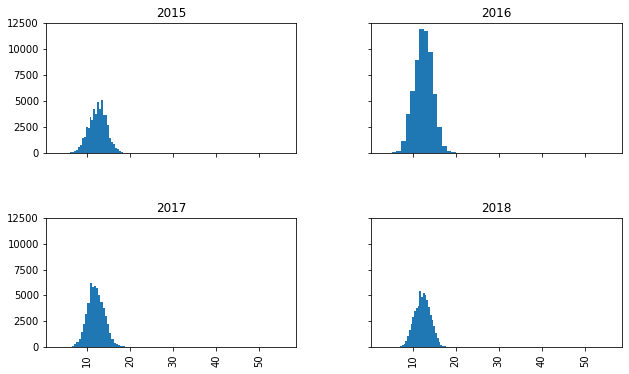

DescribeResult(nobs=53081, minmax=(4.3, 26.8), mean=12.458591586443358, variance=4.129985009551668, skewness=-0.10732759109879945, kurtosis=-0.05181842813852988)
DescribeResult(nobs=62391, minmax=(3.1, 55.9), mean=12.495311823820742, variance=4.396265085886642, skewness=0.08971170496378078, kurtosis=2.87986887635288)
DescribeResult(nobs=58559, minmax=(4.5, 29.9), mean=12.066336515309345, variance=3.862794992530983, skewness=0.18882783116334476, kurtosis=0.47173223506690576)
DescribeResult(nobs=60360, minmax=(5.1, 25.4), mean=12.344415175612987, variance=3.406311193951178, skewness=-0.010818613340096204, kurtosis=-0.08554983686061535)


In [14]:
# Create histograms of the break length each year and generate descriptive statistics.

pitches_cu['break_length'].hist(by = pitches['year'], bins = 50, figsize = (10,6), sharex = True, sharey = True)
plt.show()

# We can see from the histograms that the distributions appear quite normal except potentially for 2016 which displays
# much higher kurtosis than any other year. 

print(stats.describe(pitches_15_cu['break_length']))
print(stats.describe(pitches_16_cu['break_length']))
print(stats.describe(pitches_17_cu['break_length']))
print(stats.describe(pitches_18_cu['break_length']))

# From the statistics we can see that the mean break length appears to have stayed fairly consistent, although it did
# drop somewhat sharply in 2017 before nearly rebounding in 2018.

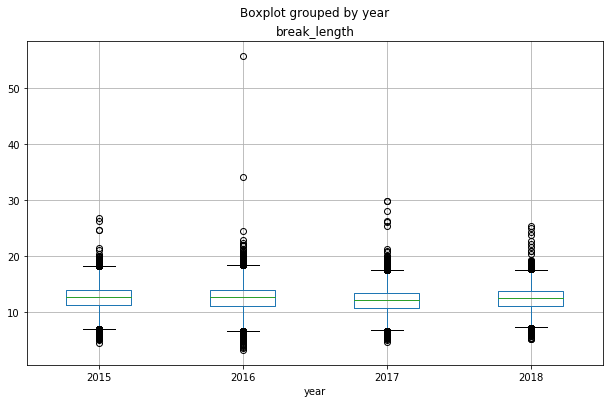

In [15]:
# Visualizing the break length another way we see again that the means are pretty consistent
# and that there is a slight outlier skew towards greater break length. 

pitches_cu.boxplot('break_length', by='year', figsize=(10, 6))

In [16]:
# Let's check to make sure that the data sets are normally distributed using
# Shaprio-Wilk.

print(stats.shapiro(pitches_15_cu['break_length']))
print(stats.shapiro(pitches_16_cu['break_length']))
print(stats.shapiro(pitches_17_cu['break_length']))
print(stats.shapiro(pitches_18_cu['break_length']))

# Even though 2016 displays a fair amount of kurtosis all of the W statistics 
# are near 1, meaning there isn't much deviation from a normal distribution.

(0.9973227977752686, 3.0824340241047576e-28)
(0.992483377456665, 0.0)
(0.9965757727622986, 9.226308222810282e-33)
(0.9974913597106934, 9.222328779466647e-29)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [17]:
# Next, I'll investigate whether there is any statistically significant 
# difference between the data sets by utilizing a one-way ANOVA test.

stats.f_oneway(pitches_15_cu['break_length'], pitches_16_cu['break_length'], pitches_17_cu['break_length'], pitches_18_cu['break_length'])

# The result of the one-way ANOVA shows that there is indeed a significant difference
# between at least one of the years.

F_onewayResult(statistic=560.4921986067841, pvalue=0.0)

In [18]:
# To see if there are any years in particular that differ more than others I use Tukey's HSD test.

tukey = pairwise_tukeyhsd(endog = pitches_cu['break_length'],      # Data
                          groups = pitches_cu['year'],   # Groups
                          alpha=0.05)

tukey.summary()

# As we can see from the table, there was a significant decrease in break length from the 2016 to 2017 season
# which then partially rebounded from the 2017 to 2018 season.

group1,group2,meandiff,p-adj,lower,upper,reject
2015,2016,0.0367,0.0095,0.0066,0.0669,True
2015,2017,-0.3923,0.001,-0.4228,-0.3617,True
2015,2018,-0.1142,0.001,-0.1445,-0.0838,True
2016,2017,-0.429,0.001,-0.4583,-0.3996,True
2016,2018,-0.1509,0.001,-0.18,-0.1218,True
2017,2018,0.2781,0.001,0.2485,0.3077,True


# Conclusions: 

1. The average four seam fastball has increased by over 0.5 mph in the last 4 seasons. In order to investigate this significant increase I would like more information on: i. whether or not the ball has changed in any tangible way ii. whether or not there has been an increased use in harder throwing relief pitchers over the past 4 years. 

2. The average spin rate of the slider has suddenly dropped significantly after increasing the previous couple of years. In order to investigate this drop I would like more information on individual pitchers spin rates to find out if this drop is reflected among all pitchers or a subset. My thinking is that there might have been a discovery that pitchers could dial back the spin rate slightly and still be effective.

3. Lastly, the average break length in curveballs has stayed fairly consistent, with one exception in the 2017 season when it dropped significantly. I would be interested in learning more about may have happend in the 2017 season. Did any pitchers with exceptionally hard breaking curveballs retire or get sent to the minors? Since there are significantly fewer curveballs thrown I imagine it might be possible for the this difference to be explained by the population changing slightly.

In conclusion, this analysis barely scrapes the surface on each of these pitches. A more in-depth analysis of each pitch would likely uncover more specific changes and trends and connections between various variables.